许飞菲 P221014424 广告学1班

In [825]:
import mytools
import pandas as pd

In [826]:
数据表 = mytools.读取SPSS数据文件(R'data\demo.sav')

# 明确数据分析目标
要求有单变量、双变量、多变量数据分析
1.对样本的情况进行描述统计
2.x变量与y变量有相关性
3.a、b、c变量影响Y变量

数据清理与转换
0.变量改名

In [827]:
数据表.rename(columns={
    '@10、1您家里有':'家庭规模',
    '@10、2口人，是':'代际',
    '@3、您的婚姻状况：':'婚姻状况',
    '@9、您的月收入大约是多少？':'月收入',
    '@4、您的受教育程度是：':'受教育程度',
    '@1、您的性别：':'性别',
    '@5、您的政治面貌：':'政治面貌',
    '@8、您的职业是：':'职业',
    '@2、您的年龄：':'年龄',
    }, inplace=True)

## 数据清理

1. 重复值处理
2. 空白值处理
3. 异常值处理
4. 变量类型处理
5. 逻辑一致性清理 

In [828]:
### 重复值处理
数据表.drop_duplicates(subset=['序号'],keep='first',inplace=True)

In [829]:
### 空白值处理
# 查看变量是否存在空白值
数据表[数据表.isnull().T.any()].head(2)
# 数据表['婚姻状况'].isnull()

,序号,性别,年龄,婚姻状况,受教育程度,政治面貌,@7、您的信仰是：,职业,月收入,家庭规模,...,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,Q21_3_T,Q21_5_T,Q21_9_T,Q21_10_T,自尊
0,94.0,1.0,58.0,NaN,未上过学,群众,佛教,牧民,NaN,NaN,...,NaN,24.0,基本满意,25.0,基本满意,3.0,3.0,3.0,3.0,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,NaN,NaN,...,NaN,26.0,满意,26.0,满意,3.0,3.0,3.0,3.0,30.0


In [830]:
# 对指定变量填充空白值
数据表['婚姻状况'].fillna('已婚', inplace=True)
数据表['月收入'].fillna('三千元以下', inplace=True)
数据表['家庭规模'].fillna(6, inplace=True)
数据表['每周上网时长'].fillna(1, inplace=True)

In [831]:
数据表['代际'] = pd.to_numeric(数据表['代际'], errors='coerce')

In [832]:
# 数据表['月收入'].mean()
数据表['代际'].mean()

2.8636363636363638

In [833]:
# 对特定值进行替换
数据表['代际'].replace({'(空)':None}, inplace=True)
数据表['代际'].fillna(3, inplace=True)

In [834]:
# 设定变量类型
数据表.astype({'代际':'int'}).head(2)

,序号,性别,年龄,婚姻状况,受教育程度,政治面貌,@7、您的信仰是：,职业,月收入,家庭规模,...,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,Q21_3_T,Q21_5_T,Q21_9_T,Q21_10_T,自尊
0,94.0,1.0,58.0,已婚,未上过学,群众,佛教,牧民,三千元以下,6.0,...,1.0,24.0,基本满意,25.0,基本满意,3.0,3.0,3.0,3.0,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,三千元以下,6.0,...,1.0,26.0,满意,26.0,满意,3.0,3.0,3.0,3.0,30.0


In [835]:
数据表.columns

Index(['序号', '性别', '年龄', '婚姻状况', '受教育程度', '政治面貌', '@7、您的信仰是：', '职业', '月收入',
       '家庭规模', '代际', '@10、3代人，家里有', '@10、4位老人，家里有', '@10、5个小孩，外出打工的人有___人。',
       '@11、您平常是否通过电脑上网？', '@12、您平常是否通过手机上网？', '@13、您平时一周有几天通过电脑上网？',
       '@14、您平时一周有几天通过手机上网？', '@15、1您每天通过手机上网的时间大概为', '@15、2分钟，您每天通过电脑上网的时间为',
       '@15、3分钟，您每个月的手机话费为', '@15、4元，您家的宽带费为___元。',
       '@16、互联网使用行为（问卷17题至26题）—17、您', '@16、18、您认为您在上网时使用搜索引擎（百度',
       '@16、19、您经常会通过互联网（辣椒直播、下厨', '@16、20、您认为您玩手机网络游戏（斗地主、斗',
       '@16、21、您经常会通过互联网观看小说么？', '@16、22、您经常会通过互联网观看视频（快手、',
       '@16、23、您认为您通过即时通讯（微信、QQ）与他', '@16、24、您经常会通过社交网络（微博、陌陌、',
       '@16、25、您认为您在互联网（淘宝、拼多多、京', '@16、26、您经常使用移动支付（支付宝、微信支', 'Q17_1',
       'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', '@18、请表述您最近一周的情感状况—6.爱', '@18、7.愉悦',
       '@18、8.自豪', '@18、9.愤怒', '@18、10.忧虑', '@18、11.悲哀',
       '@19、第三部分—1.我能够获得足够有用的媒介信', '@19、2.我能够不断更新自己的信息获取技能。',
       '@19、3.我具有较强的信息获取意识。', '@19、4.我能够熟练使用软件工具进行信息检索。',
       '@19、5.我能够通过寻找佐证资料判断信息的可信', '@19、6.能够通过标题、内容等判断信息的可信度',

In [836]:
# 生成变量
数据表['信息鉴别能力'] = 数据表['@19、9.我能够通过信息发布机构的权威性判断信']     + 数据表['@19、10.我通过网络微信微博QQ等分享社会时事新']
+ 数据表['@19、11.我通过网络微信微博QQ等参与投票、网络']
+ 数据表['@19、12.我通过网络参与社会公共事件讨论。']
+ 数据表['@19、13.我通过网络微信微博QQ等参与社会实践。']

0     2.0
1     2.0
2     2.0
3     2.0
4     3.0
     ... 
89    3.0
90    4.0
91    2.0
92    4.0
93    2.0
Name: @19、13.我通过网络微信微博QQ等参与社会实践。, Length: 94, dtype: float64

单变量数据分析

count    94.000000
mean      5.308511
std       1.524189
min       2.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       9.000000
Name: 信息鉴别能力, dtype: float64


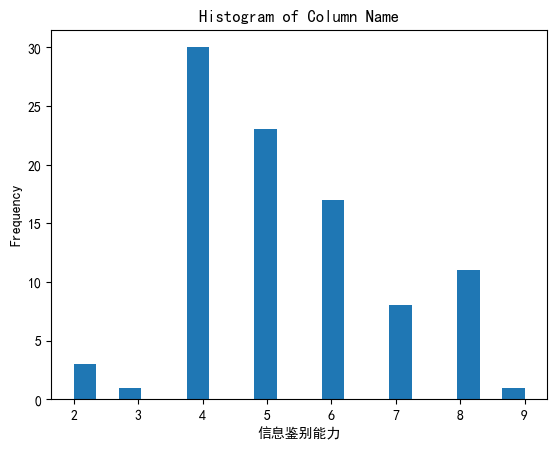

In [837]:
import numpy as np  
import matplotlib.pyplot as plt  
   
  
# 描述性统计分析  
print(数据表['信息鉴别能力'].describe())  # 输出描述性统计量  
  
# 绘制直方图  
plt.hist(数据表['信息鉴别能力'], bins=20)  
plt.xlabel('信息鉴别能力')  
plt.ylabel('Frequency')  
plt.title('Histogram of Column Name')  
plt.show()

双变量数据分析

In [838]:
mytools.相关系数判断(0.2056)

'弱相关'

In [839]:
tau_y = mytools.goodmanKruska_tau_y(数据表,'家庭规模','月收入')
print(tau_y)

0.06904437354264338


In [840]:
mytools.相关系数判断(tau_y)

'极弱相关或无相关'

In [841]:
from scipy import stats

In [842]:
from scipy import stats
x = 数据表['家庭规模']
y = 数据表['月收入']

In [843]:
tau_y = mytools.goodmanKruska_tau_y(数据表,'家庭规模','受教育程度')
print(tau_y)

0.07053891814173552


In [844]:
import pandas as pd
chi2, p, dof, ex = stats.chi2_contingency(pd.crosstab(x,y))
print(F"卡方值: {chi2: .2f}, p值: {p: .4f},自由度:{dof}。")

卡方值:  12.40, p值:  0.8261,自由度:18。


In [847]:
from tabulate import tabulate
import pandas as pd

# 创建一个DataFrame
df = pd.DataFrame({'col_two' : [0.0001, 1e-005 , 1e-006, 1e-007],
                   'column_3' : ['ABCD', 'ABCD', 'long string', 'ABCD']})

# 使用tabulate打印DataFrame
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+-----------+-------------+
|    |   col_two | column_3    |
|----+-----------+-------------|
|  0 |    0.0001 | ABCD        |
|  1 |    1e-05  | ABCD        |
|  2 |    1e-06  | long string |
|  3 |    1e-07  | ABCD        |
+----+-----------+-------------+


In [848]:
mytools.两个无序类别变量的统计分析(数据表,'家庭规模','月收入')

tau_y系数: 0.0690 极弱相关或无相关
月收入        无收入     三千元以下    三千到六千元       All
家庭规模                                        
2.0   0.000000  0.000000  0.021277  0.021277
3.0   0.000000  0.031915  0.031915  0.063830
4.0   0.000000  0.021277  0.021277  0.042553
5.0   0.010638  0.042553  0.074468  0.127660
6.0   0.000000  0.138298  0.095745  0.234043
7.0   0.021277  0.085106  0.074468  0.180851
8.0   0.021277  0.053191  0.106383  0.180851
9.0   0.010638  0.021277  0.010638  0.042553
10.0  0.010638  0.042553  0.042553  0.095745
12.0  0.000000  0.010638  0.000000  0.010638
All   0.074468  0.446809  0.478723  1.000000
卡方值： 12.40, p值： 0.8261,自由度:18。
接受虚无假设


In [849]:
mytools. 两个无序类别变量的统计分析(数据表,'家庭规模','受教育程度')

tau_y系数: 0.0705 极弱相关或无相关
受教育程度      未上过学        小学        初中        高中        大学       All
家庭规模                                                             
2.0    0.000000  0.021277  0.000000  0.000000  0.000000  0.021277
3.0    0.010638  0.042553  0.010638  0.000000  0.000000  0.063830
4.0    0.000000  0.031915  0.010638  0.000000  0.000000  0.042553
5.0    0.053191  0.063830  0.000000  0.010638  0.000000  0.127660
6.0    0.095745  0.106383  0.021277  0.000000  0.010638  0.234043
7.0    0.053191  0.095745  0.021277  0.010638  0.000000  0.180851
8.0    0.053191  0.117021  0.000000  0.010638  0.000000  0.180851
9.0    0.010638  0.021277  0.010638  0.000000  0.000000  0.042553
10.0   0.042553  0.042553  0.000000  0.000000  0.010638  0.095745
12.0   0.010638  0.000000  0.000000  0.000000  0.000000  0.010638
All    0.329787  0.542553  0.074468  0.031915  0.021277  1.000000
卡方值： 23.97, p值： 0.9376,自由度:36。
接受虚无假设


In [850]:
from scipy.stats import somersd
"""x,y 应该为定序变量，次序是关键！"""
x = 数据表['月收入'].cat.codes
y = 数据表['受教育程度'].cat.codes
result = somersd(x,y)
result.statistic
somersd(x,y)

SomersDResult(statistic=-0.10844337735094038, pvalue=0.3055383451983862, table=array([[ 0,  3,  1,  2,  1],
       [16, 23,  2,  1,  0],
       [15, 25,  4,  0,  1]]))

In [851]:
mytools.两个有序类别变量的统计分析(数据表,'月收入','受教育程度')

Somers dy系数:-0.1084 极弱相关或无相关
------------  --  --  -  -  -
无收入         0   3  1  2  1
三千元以下    16  23  2  1  0
三千到六千元  15  25  4  0  1
------------  --  --  -  -  -
p值： 0.3055
接受虚无假设


education_level  college  graduate  high school  All
monthly_income                                      
3000                   1         0            0    1
4000                   0         1            0    1
5000                   0         0            1    1
5500                   1         0            0    1
6000                   0         1            0    1
7000                   0         0            1    1
8000                   1         0            0    1
9000                   0         1            0    1
All                    3         3            2    8


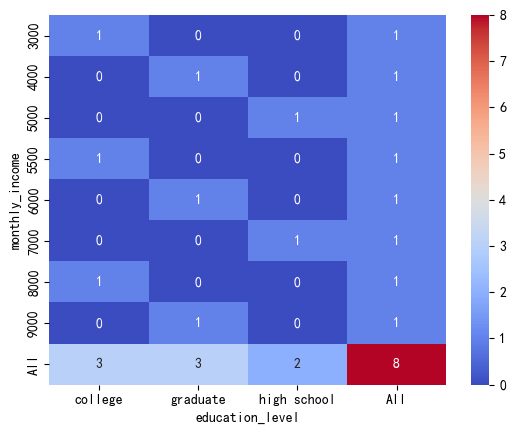

In [852]:
import pandas as pd
import seaborn as sns

# 创建一个示例数据集
df = pd.DataFrame({
    'monthly_income': [5000, 8000, 3000, 6000, 7000, 4000, 5500, 9000],
    'education_level': ['high school', 'college', 'college', 'graduate', 'high school', 'graduate', 'college', 'graduate'],
})

# 创建包含比例和合计的交叉表
ct_margins = pd.crosstab(df['monthly_income'], df['education_level'], margins=True)
sns.heatmap(ct_margins, cmap='coolwarm', annot=True)
print(ct_margins)

In [853]:
# 使用plotly绘制散点图
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length" )
fig.show()

In [854]:
print(数据表['受教育程度'].unique())

['未上过学', '小学', '初中', '高中', '大学']
Categories (6, object): ['未上过学' < '小学' < '初中' < '高中' < '大学' < '研究生及以上']


In [855]:
education_map = {'未上过学': 1,'小学': 2, '初中': 3, '高中': 4, '大学': 5}  # 假设的映射字典  
数据表['受教育程度'] = 数据表['受教育程度'].map(education_map)

In [856]:
fig = px.scatter(数据表, x="受教育程度", y="年龄", trendline='ols' )
fig.show()

In [857]:
from scipy import stats
x = 数据表['受教育程度']
y = 数据表['每周上网时长']
r, p =stats.pearsonr(x, y)
print(r,p)

0.221566360383313 0.0318590716525134


In [858]:
import plotly.express as px
数据表= px.data.tips()
fig = px.box(数据表, x="total_bill", y="time")
fig.show()

In [859]:
fig = px.box(数据表,x = "time",y = "total_bill")
fig.show()

In [860]:
from statsmodels.formula.api import ols
model = ols('total_bill ~ time',数据表).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     8.396
Date:                Wed, 03 Jan 2024   Prob (F-statistic):            0.00410
Time:                        22:27:25   Log-Likelihood:                -875.02
No. Observations:                 244   AIC:                             1754.
Df Residuals:                     242   BIC:                             1761.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.7972      0.661     31.460      0.000      19.495      22.099
time[T.Lunch]    -3.6285      1.252     -2.898      0.004      -6.095      -1.162
==============================================================================
Omnibus:                       44.811   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.308
Skew:                           1.111   Prob(JB):                     6.58e-15
Kurtosis:                       4.218   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [861]:
mytools.类别变量与数值变量统计分析(数据表,'time','total_bill')

相关比率：0.033532057384179303


多变量数据分析

In [862]:
from scipy import stats
import matplotlib.pyplot as plt

In [863]:
print(数据表.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [864]:
# 创建月收入、每周上网时长和性别的交互表
cross_tab = pd.crosstab(index=[数据表['total_bill'], 数据表['time']],
                        columns=数据表['size'],
                        margins=True, normalize=True) # 归一化，显示百分比 

# 显示交互表  
print("交互表（百分比）：")  
print(cross_tab)  
  
# 显示交互表的合计  
print("\n交互表合计：")  
print(cross_tab.loc['All'])  # 显示行合计  
print(cross_tab.iloc[:, -1])  # 显示列合计  

交互表（百分比）：
size                      1         2         3         4         5         6  \
total_bill time                                                                 
3.07       Dinner  0.004098  0.000000  0.000000  0.000000  0.000000  0.000000   
5.75       Dinner  0.000000  0.004098  0.000000  0.000000  0.000000  0.000000   
7.25       Dinner  0.004098  0.004098  0.000000  0.000000  0.000000  0.000000   
7.51       Lunch   0.000000  0.004098  0.000000  0.000000  0.000000  0.000000   
7.56       Lunch   0.000000  0.004098  0.000000  0.000000  0.000000  0.000000   
...                     ...       ...       ...       ...       ...       ...   
48.17      Dinner  0.000000  0.000000  0.000000  0.000000  0.000000  0.004098   
48.27      Dinner  0.000000  0.000000  0.000000  0.004098  0.000000  0.000000   
48.33      Dinner  0.000000  0.000000  0.000000  0.004098  0.000000  0.000000   
50.81      Dinner  0.000000  0.000000  0.004098  0.000000  0.000000  0.000000   
All               

In [ ]:
from scipy import stats
# 假设我们关注的是类型（假设类型1用数字“1”表示）
size = '1'

# 筛选出特定类型的数据
数据表_size= 数据表[数据表['size'] == size]

# 创建每周上网时长和月收入的交互表
cross_tab_size= pd.crosstab(数据表_size['total_bill'], 数据表_size['time'])

# 进行卡方检验
chi2_level, p_level, dof_level, expected_level = stats.chi2_contingency(cross_tab_size)
print("\n卡方检验结果：")  
print(f"χ² = {chi2_level}, p = {p_level}, df = {dof_level}")

In [ ]:
mytools.两个无序类别变量的统计分析(数据表_size,'time','total_bill')
